<a href="https://colab.research.google.com/github/HugoLeda/machine_learning/blob/main/NASA_Asteroids_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9f5a21f3e48d36c9a72927e4ae2fbf09c57364a6969460eac2297a312c2af8e1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
!wget https://raw.githubusercontent.com/HugoLeda/machine_learning/main/asteroids_nasa.csv

--2024-05-12 20:49:04--  https://raw.githubusercontent.com/HugoLeda/machine_learning/main/asteroids_nasa.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2425254 (2.3M) [text/plain]
Saving to: ‘asteroids_nasa.csv’

asteroids_nasa.csv  100%[===================>]   2.31M  10.8MB/s    in 0.2s    

2024-05-12 20:49:05 (10.8 MB/s) - ‘asteroids_nasa.csv’ saved [2425254/2425254]



In [4]:
df = pd.read_csv('asteroids_nasa.csv')
df.shape

(4687, 40)

In [5]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [6]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [8]:
df.rename(columns={'Hazardous': 'Class'}, inplace=True)

In [9]:
df = df.drop(['Orbiting Body','Equinox'],axis=1)

In [10]:
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)

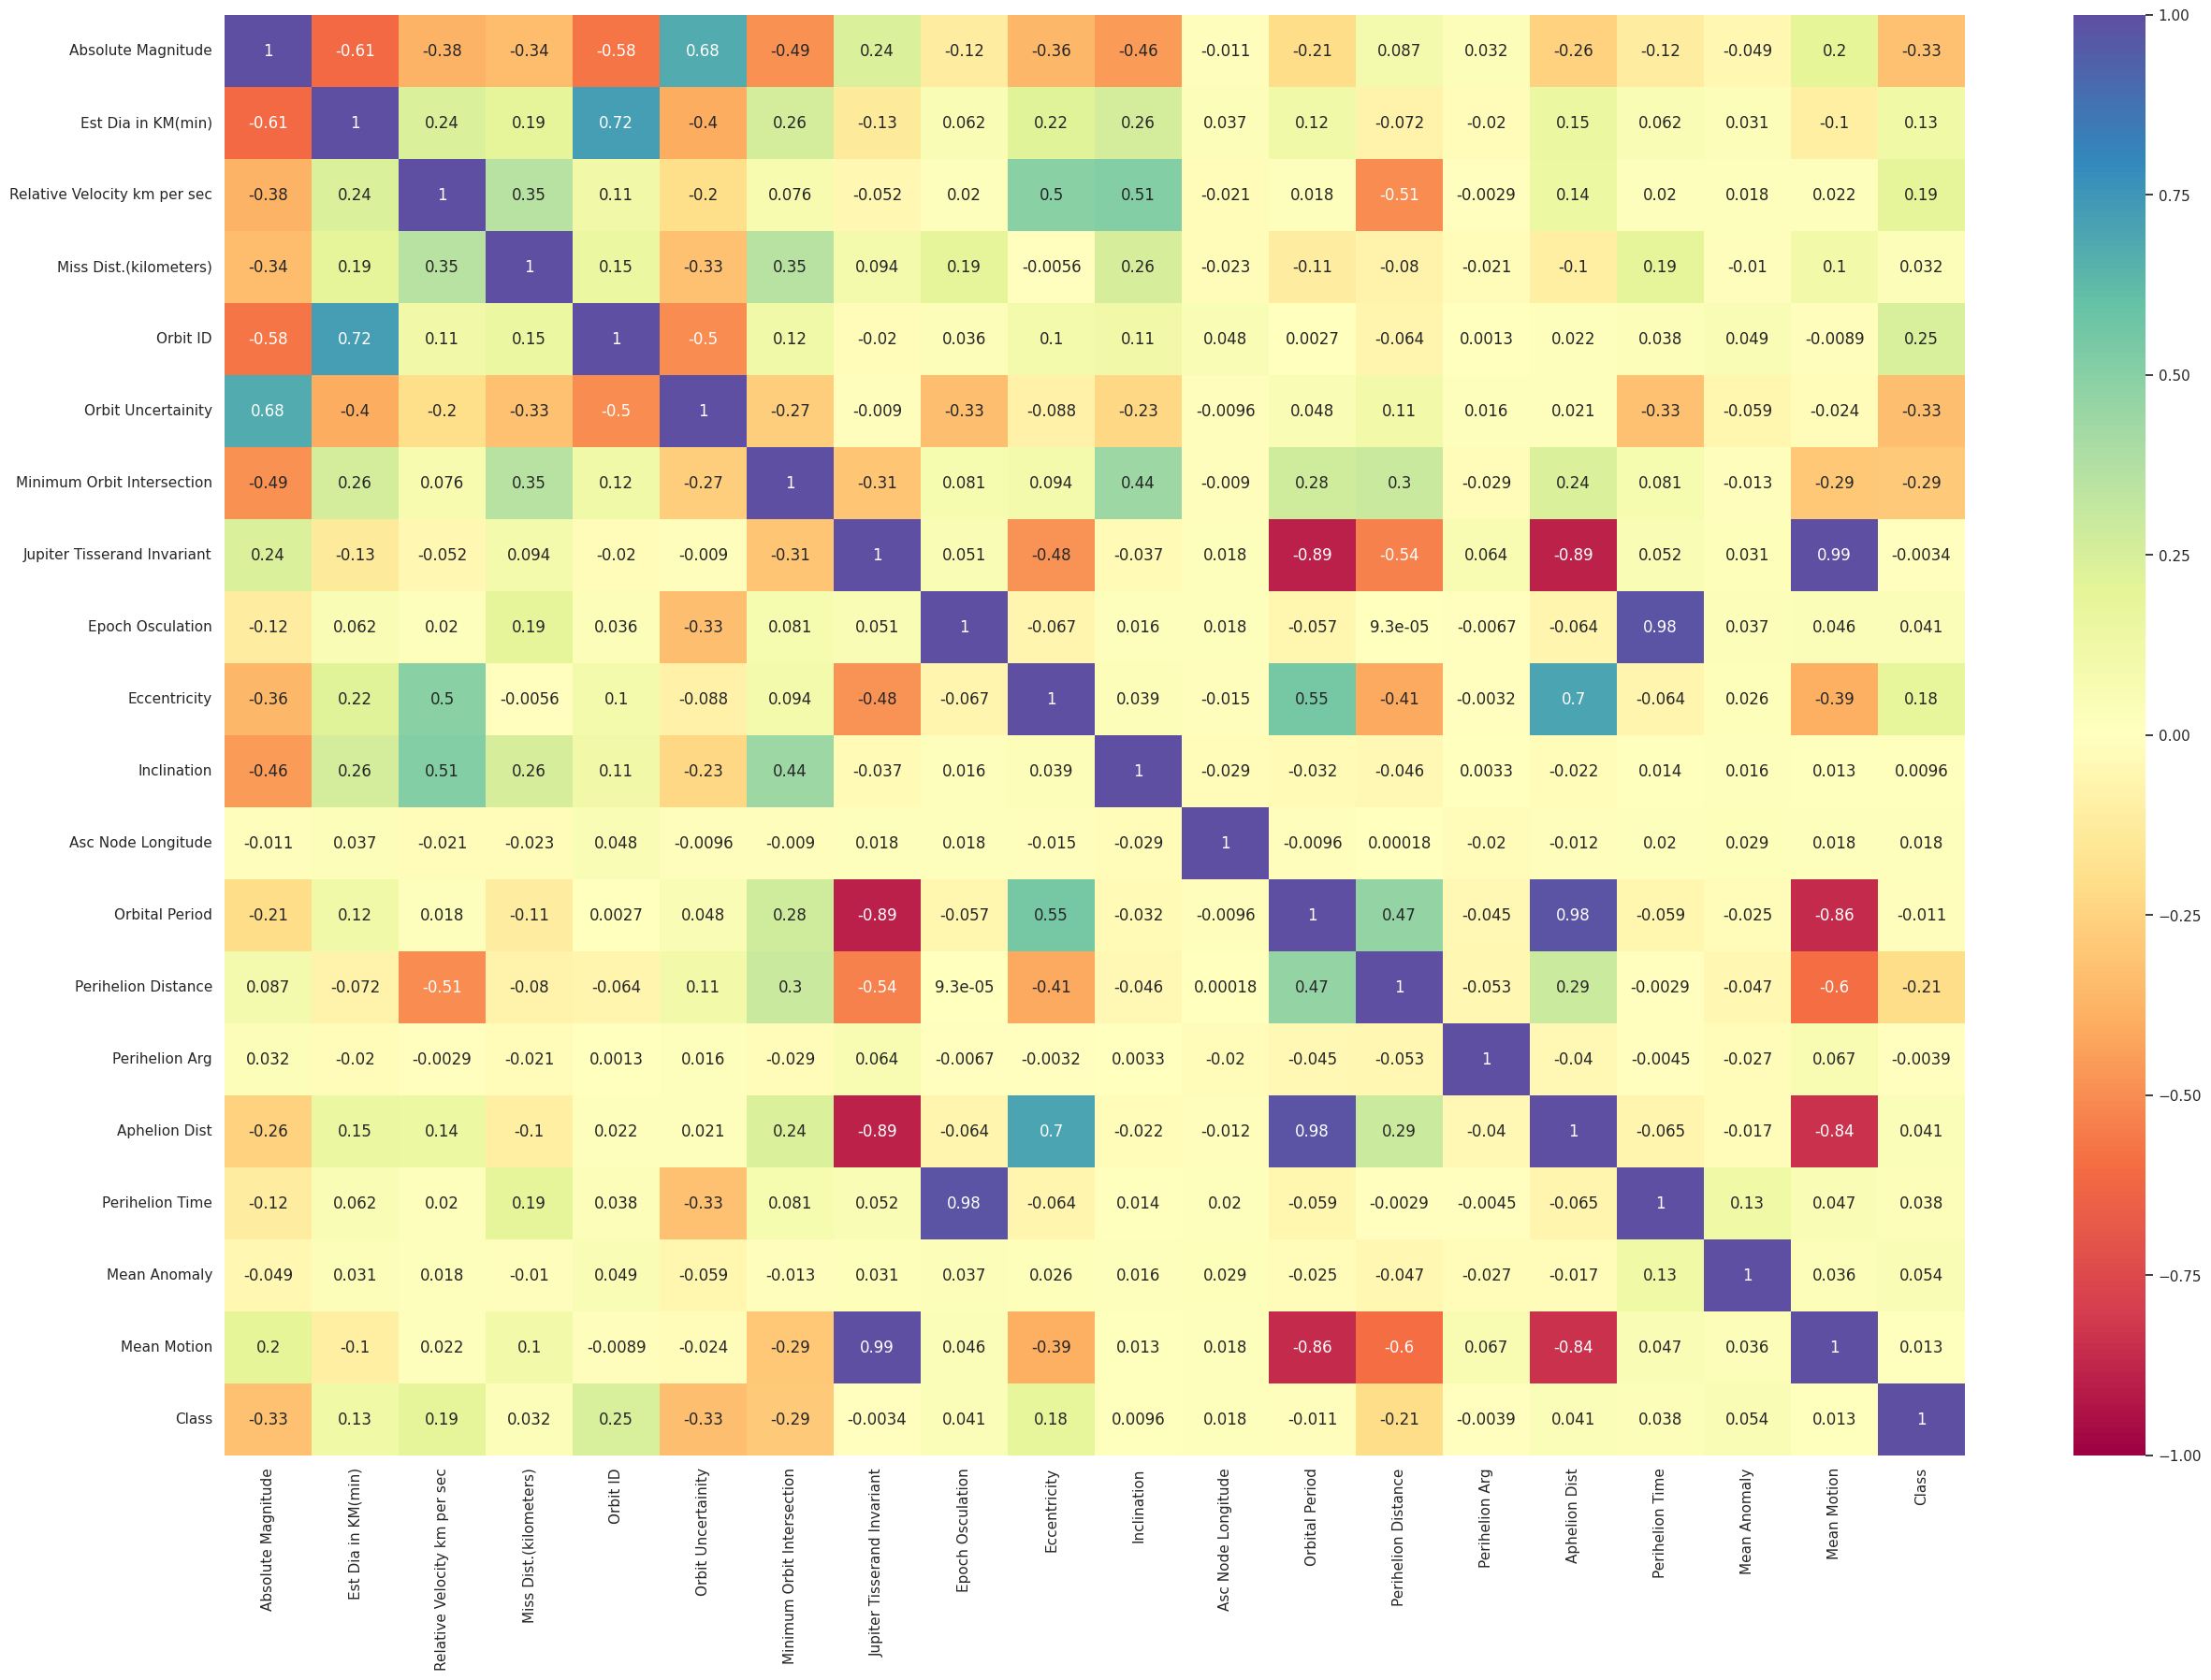

In [11]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

In [12]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Class
0,21.6,0.127220,6.115834,62753692.0,17,5,0.025282,4.634,2458000.5,0.425549,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,18.113985,57298148.0,21,3,0.186935,5.457,2458000.5,0.351674,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,7.590711,7622911.5,22,0,0.043058,4.557,2458000.5,0.348248,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,11.173874,42683616.0,7,6,0.005512,5.093,2458000.5,0.216578,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,9.840831,61010824.0,25,1,0.034798,5.154,2458000.5,0.210448,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


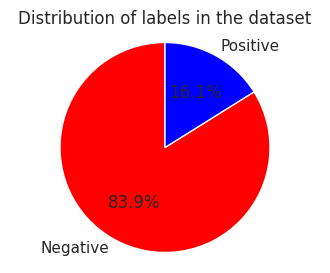

In [22]:
total_records = df.shape[0]

positives = df[df['Class'] == True].shape[0]
negatives = df[df['Class'] == False].shape[0]

percentage_negatives = (negatives / total_records) * 100
percentage_positives = (positives / total_records) * 100

labels = ['Negative', 'Positive']

colors = ['red', 'blue']
values = [percentage_negatives, percentage_positives]

plt.figure(figsize=(4, 3))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of labels in the dataset')
plt.axis('equal')

plt.show()

In [18]:
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,13.970811,3.841347e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,7.293223,2.181110e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,0.335504,2.660989e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,8.432865,1.995928e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,12.917889,3.964771e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,18.077649,5.746863e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,44.633747,7.478160e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [19]:
features = df.drop('Class', axis=1).values
label = df['Class'].values

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.2, random_state=42, stratify=label)

In [24]:
df_graph = df.copy()
feature_names = df_graph.drop('Class', axis=1).columns.tolist()
del df_graph

In [31]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=600),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

results = []

for name, model in models.items():
  model.fit(X_train, Y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  accuracy_train = accuracy_score(Y_train, y_pred_train)
  accuracy_test = accuracy_score(Y_test, y_pred_test)

  report_train = classification_report(Y_train, y_pred_train, output_dict=True)
  report_test = classification_report(Y_test, y_pred_test, output_dict=True)

  results.append({
      'Model': name,
      'Train accuracy': accuracy_train,
      'Test accuracy': accuracy_test,
      **report_train['weighted avg'],
      **report_test['weighted avg']
  })

df_results = pd.DataFrame(results)

df_results_sorted = df_results.sort_values(by='Train accuracy', ascending=False)

def style_format(val):
  if val == df_results_sorted.iloc[0]['Model']:
    color = 'green'
  elif val == df_results_sorted.iloc[1]['Model']:
    color = 'yellow'
  elif val == df_results_sorted.iloc[2]['Model']:
    color = 'red'
  else:
    color = 'black'
  return f'color: {color}; text-align: left;'

styled_df = df_results_sorted.style.applymap(style_format, subset=['Model'])

styled_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

,Model,Train accuracy,Test accuracy,precision,recall,f1-score,support
0,Random Forest,1.000000,0.997868,0.997868,0.997868,0.997868,938
4,Decision Tree,1.000000,0.993603,0.993586,0.993603,0.993586,938
3,KNN,0.847693,0.823028,0.751276,0.823028,0.772452,938
1,Logistic Regression,0.838890,0.839019,0.703953,0.839019,0.765575,938
2,SVM,0.838890,0.839019,0.703953,0.839019,0.765575,938
